##  Lead Scoring
                                                                                        
    
* An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. <br>
* Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:<br>
* As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.<br>
* X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. 

### Reading and Understanding the Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None )
pd.set_option('display.max_rows', 200)

##### Reading the data 

In [2]:
lead_df = pd.read_csv('leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##### Understanding the shape of the data 

In [3]:
lead_df.shape
print("No.of rows : ", lead_df.shape[0], 'No. of columns: ',lead_df.shape[1])

No.of rows :  9240 No. of columns:  37


In [4]:
#fetching the info of all the columns
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

    -As mentioned in the data directionery Specialization column
    Includes the level 'Select Specialization' which means the 
    customer had not selected this option while filling the form.

In [5]:
# Iterate through columns and print unique values where 'Select' is present
for col in lead_df.columns:
    select_values = lead_df[col][lead_df[col] == 'Select'].unique()
    if len(select_values) > 0:
        print(f"Column: {col}, Select Values: {select_values}")

Column: Specialization, Select Values: ['Select']
Column: How did you hear about X Education, Select Values: ['Select']
Column: Lead Profile, Select Values: ['Select']
Column: City, Select Values: ['Select']


In [6]:
#replacing Select values as these values are not filled while filling the form

lead_df = lead_df.replace('Select', np.nan)

In [7]:
#checking the df again

lead_df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


    -Checking the stats

In [8]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Checking the percentage of  Null Values 

In [9]:
Null_values = lead_df.isnull().sum()/lead_df.shape[0]*100

In [10]:
Null_values.sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

#### Dropping columns with more than 40% null values 

In [11]:
null40 = (Null_values[Null_values>40]).index.to_list()
lead_df.drop(columns = null40, inplace = True)
print('New shape :', lead_df.shape)

New shape : (9240, 30)


In [12]:
#fetching the updated info 
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [13]:
#checking the null values after dropping the columns above 40% null values 

null_values = lead_df.isnull().sum()/lead_df.shape[0]*100
null_values.sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

#### Imputing numerical columns with median and categorical columns with mode in place of Null Values

In [14]:
#list of columns having null values
null_values = null_values[null_values>0]
null_values = null_values.index.to_list()
null_values

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City']

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
# Identify columns with missing values
numeric_cols_missing_values = lead_df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols_missing_values = lead_df.select_dtypes(include=['object']).columns

# Impute missing values in numerical columns with the median
numeric_imputer = SimpleImputer(strategy='median')
lead_df[numeric_cols_missing_values] = numeric_imputer.fit_transform(lead_df[numeric_cols_missing_values])

# Impute missing values in categorical columns with the most frequent category
categorical_imputer = SimpleImputer(strategy='most_frequent')
lead_df[categorical_cols_missing_values] = categorical_imputer.fit_transform(lead_df[categorical_cols_missing_values])

In [17]:
#Checking final null values in the columns
lead_df.isna().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

##### Checking unique value counts 
    -knowing the unique values and their frequencies is crucial. 
    It helps in understanding the distribution of categories and can inform decisions 
    about how to handle them in further analyses or modeling.

In [18]:
lead_df.nunique().sort_values(ascending = False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     18
Last Activity                                      17
Last Notable Activity                              16
What is your current occupation                     6
City                                                6
Lead Origin                                         5
What matters most to you in choosing a course       3
Converted                                           2
Do Not Call                                         2
A free copy of Mastering The Interview              2
Through Recommendations     

In [19]:
print(lead_df.Magazine.value_counts())
print(lead_df['Receive More Updates About Our Courses'].value_counts())
print(lead_df['Update me on Supply Chain Content'].value_counts())
print(lead_df['Get updates on DM Content'].value_counts())
print(lead_df['I agree to pay the amount through cheque'].value_counts())

No    9240
Name: Magazine, dtype: int64
No    9240
Name: Receive More Updates About Our Courses, dtype: int64
No    9240
Name: Update me on Supply Chain Content, dtype: int64
No    9240
Name: Get updates on DM Content, dtype: int64
No    9240
Name: I agree to pay the amount through cheque, dtype: int64


    -As we can see, above mentioned columns have only 1 value, witch will not make any difference to our analysis, 
    hence we can go ahead and drop it.

In [20]:
#dropping the columns with unique value count 1
Unique_Count=lead_df.nunique()
Single_unique_cols=Unique_Count[Unique_Count==1]
Single_unique_cols=Single_unique_cols.index.to_list()
lead_df.drop(columns=Single_unique_cols,axis=1,inplace=True)
lead_df.shape

(9240, 25)

In [21]:
lead_df.nunique().sort_values(ascending= False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     18
Last Activity                                      17
Last Notable Activity                              16
What is your current occupation                     6
City                                                6
Lead Origin                                         5
What matters most to you in choosing a course       3
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
Search                      

    -Dropping columns of customer IDs and numbers associated with the leads, as they are of no use in the analysis 
    except for merging, if need be.

In [22]:
lead_df.drop(columns = ['Prospect ID', 'Lead Number'], inplace = True )

##### Checking the value counts in each column for the data ditribution and data imbalance 

In [23]:
for col in lead_df:
    print(lead_df[col].value_counts())
    print("---------------------------------------------------------------")

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
---------------------------------------------------------------
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
---------------------------------------------------------------
No     8506
Yes     734
Name: Do Not Email, dtype: int64
---------------------------------------------

    -Almost all the columns have same values except few of them, so going ahead and dropping them

In [24]:
#mode_value_spec = leads_data['Specialization'].mode()[0]
#mode_value_lead = leads_data['Lead Profile'].mode()[0]
#mode_value_how = leads_data['How did you hear about X Education'].mode()[0]
#print(mode_value_spec,mode_value_lead,mode_value_how)

In [25]:
#leads_data.drop(['City','Lead Profile','How did you hear about X Education','Specialization'] ,axis=1, inplace=True)

In [26]:
lead_df.drop(columns=["Do Not Call","Through Recommendations","Digital Advertisement","Newspaper","X Education Forums","Newspaper Article","Search","What matters most to you in choosing a course"],inplace=True)

In [27]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   float64
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   float64
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Country                                 9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

    -Creating list of Categorical and numerical columns, which will help us in EDA

In [28]:
cat_cols = lead_df.select_dtypes(include = 'object').columns.to_list()
num_cols = lead_df.select_dtypes(include = ['float64', 'int64']).columns.to_list()
num_cols.remove('Converted')

    -Summary of Target variable i.e leads converted and not converted

In [29]:
lead_df.Converted.value_counts()

0.0    5679
1.0    3561
Name: Converted, dtype: int64

#### Checking the co-relation between the numeric columns 

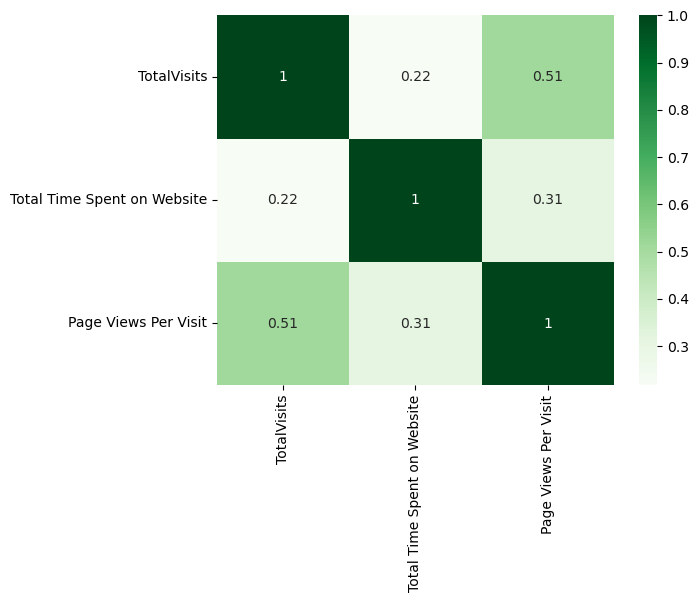

In [30]:
sns.heatmap(data = lead_df[num_cols].corr(), cmap = 'Greens', annot = True)
plt.show()

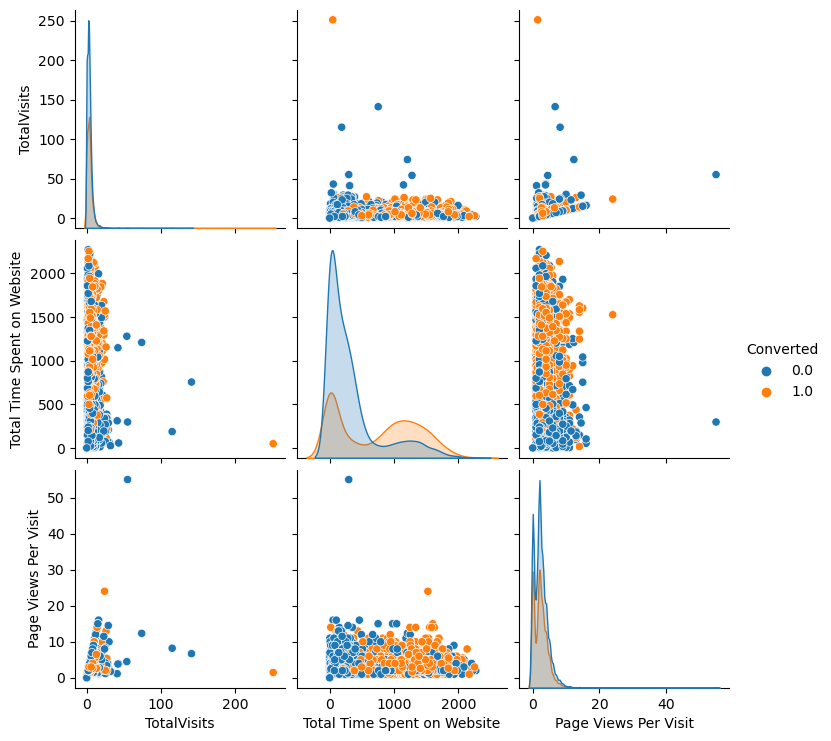

In [31]:
sns.pairplot(data = lead_df, hue = 'Converted')
plt.show()

### Checking for outliers 

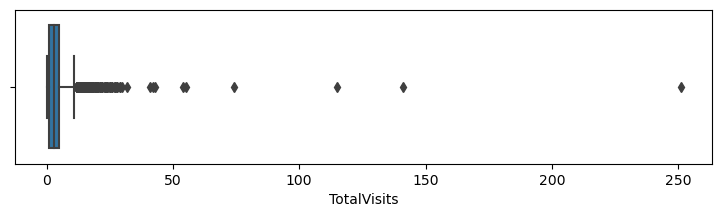

------------------------------------------------------------------------------------------


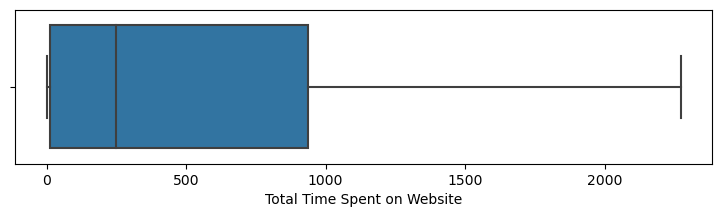

------------------------------------------------------------------------------------------


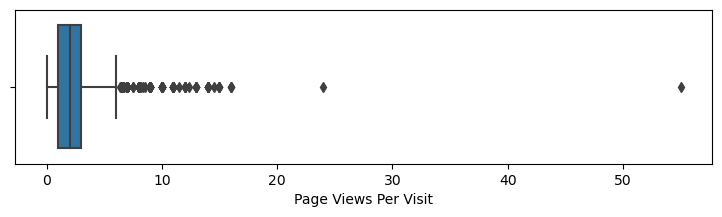

------------------------------------------------------------------------------------------


In [32]:
for col in num_cols:
    plt.figure(figsize=(9,2))
    sns.boxplot(x=lead_df[col])
    plt.show()
    print("-"*90)

In [33]:
lead_df.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,251.000000,2272.000000,55.000000


#### Outlier treatment -  capping

In [34]:
# Defining UDF to treat outliers via capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])
        

In [35]:
# Checking outliers for numerical variables other than target variable 
capping_cols = ["TotalVisits","Page Views Per Visit"]

# UDF 
Outlier_treatment(lead_df,capping_cols)

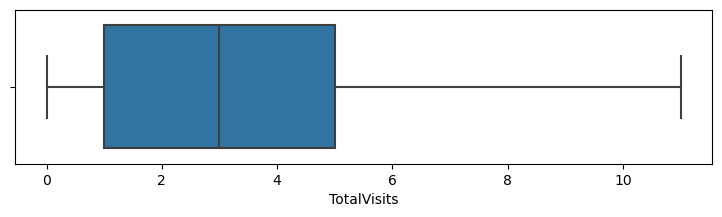

------------------------------------------------------------------------------------------


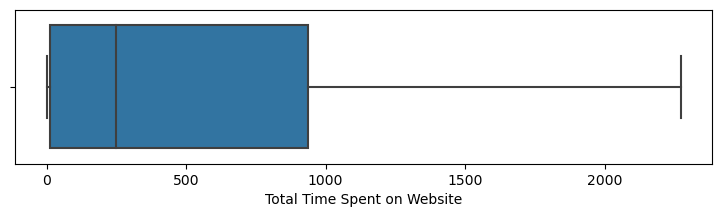

------------------------------------------------------------------------------------------


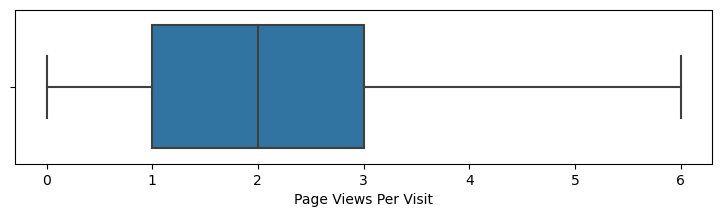

------------------------------------------------------------------------------------------


In [36]:
for col in num_cols:
    plt.figure(figsize=(9,2))
    sns.boxplot(x=lead_df[col])
    plt.show()
    print("-"*90)

### Categorical Analysis  

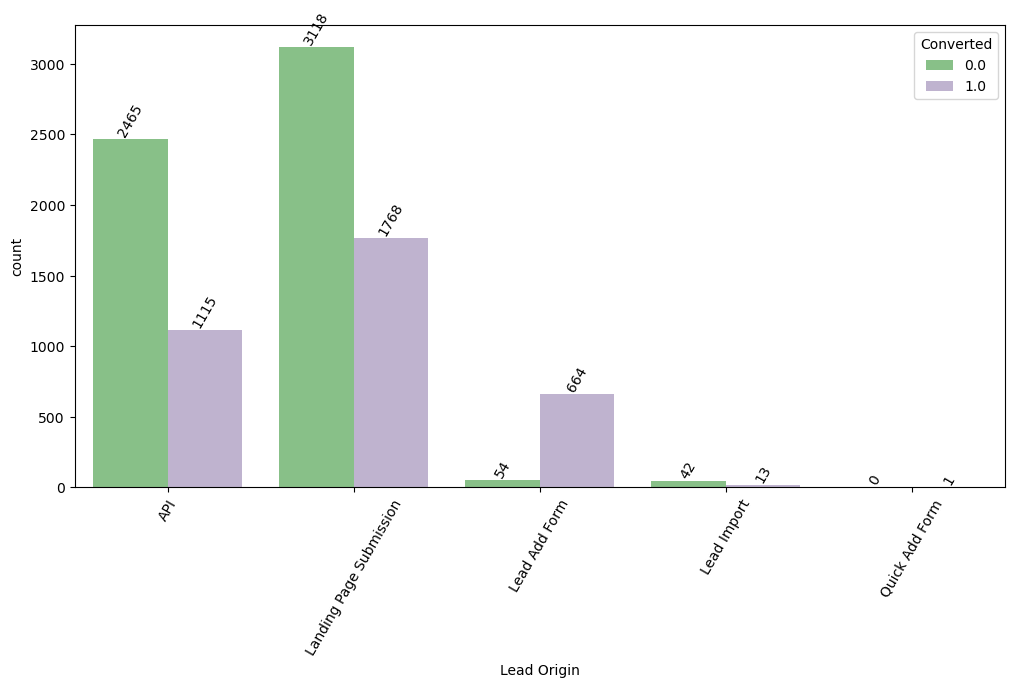

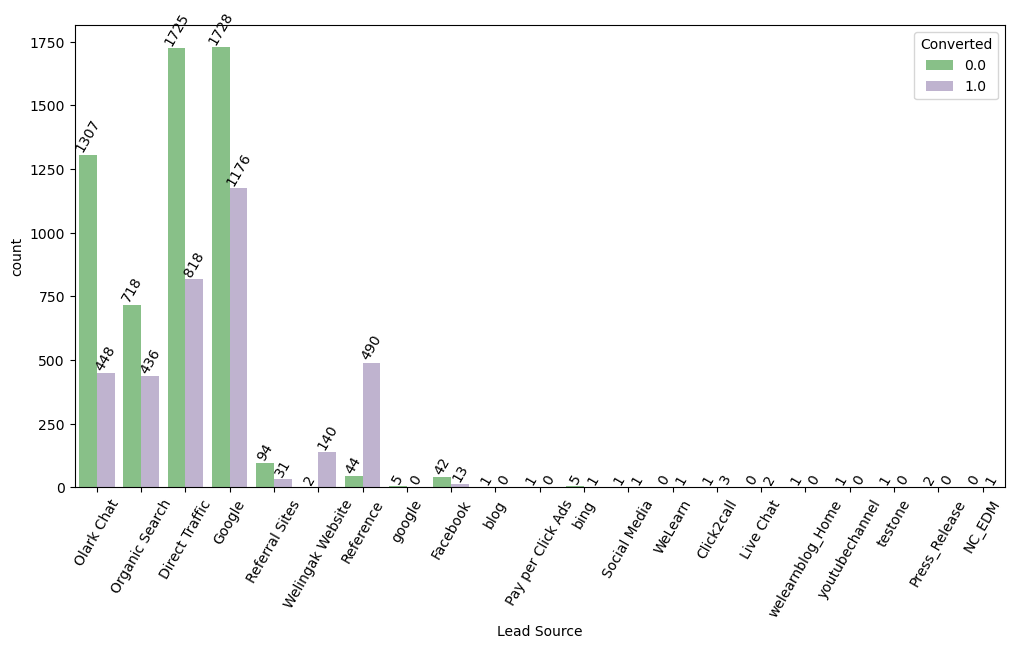

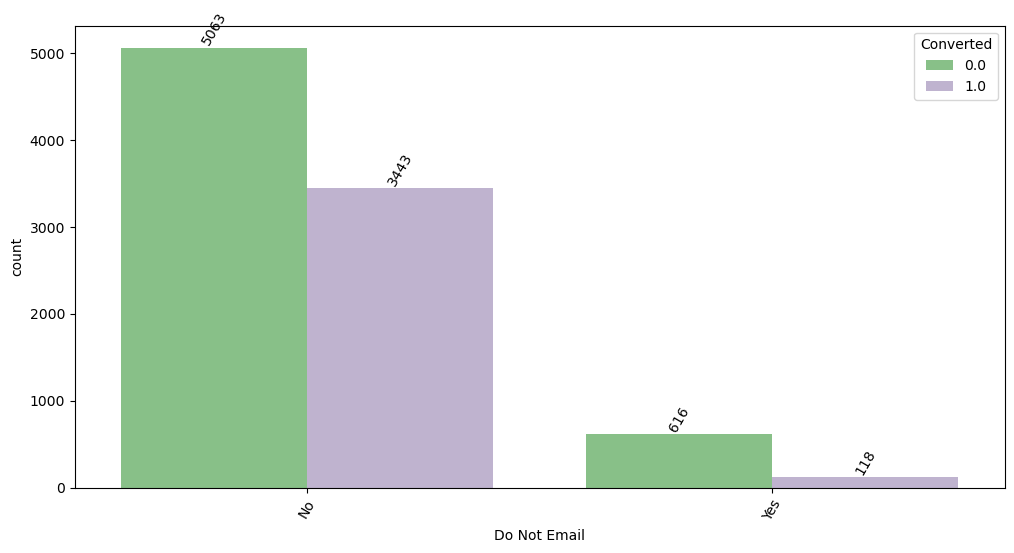

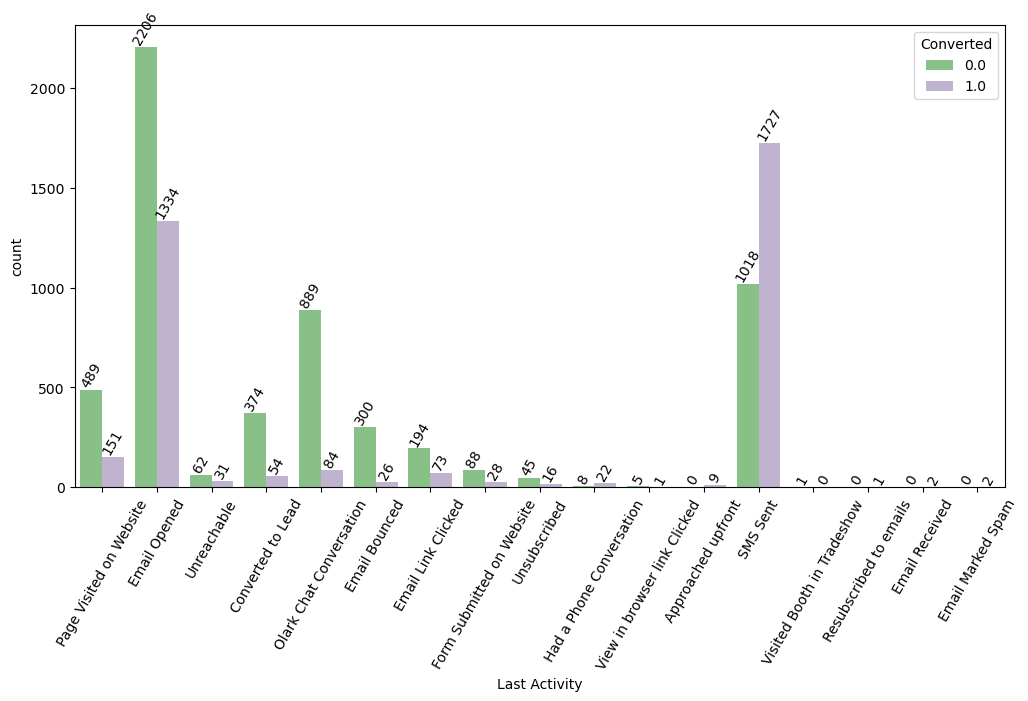

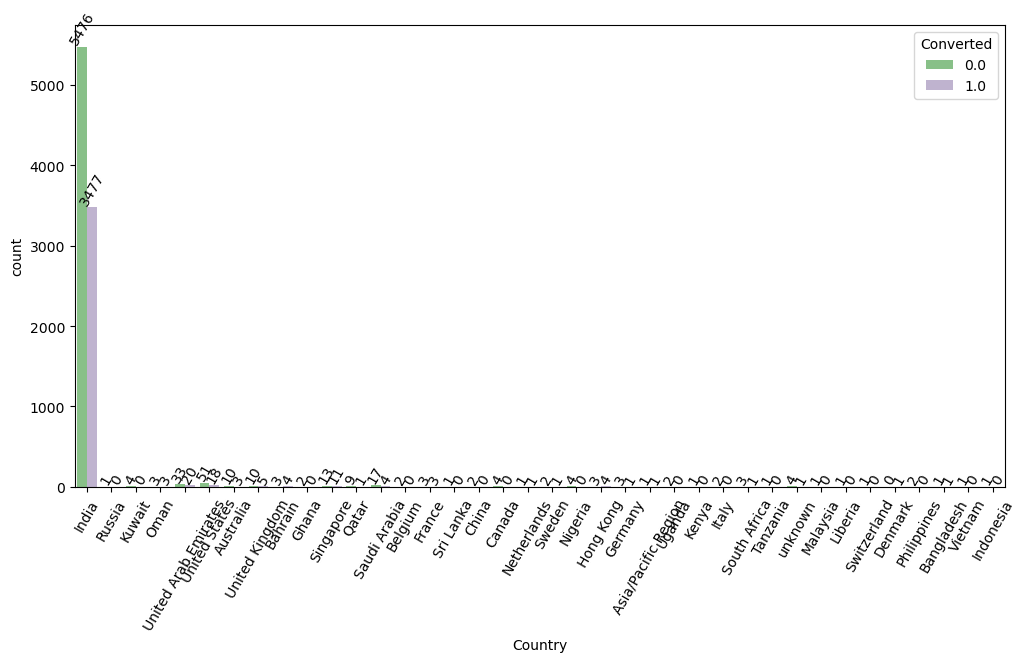

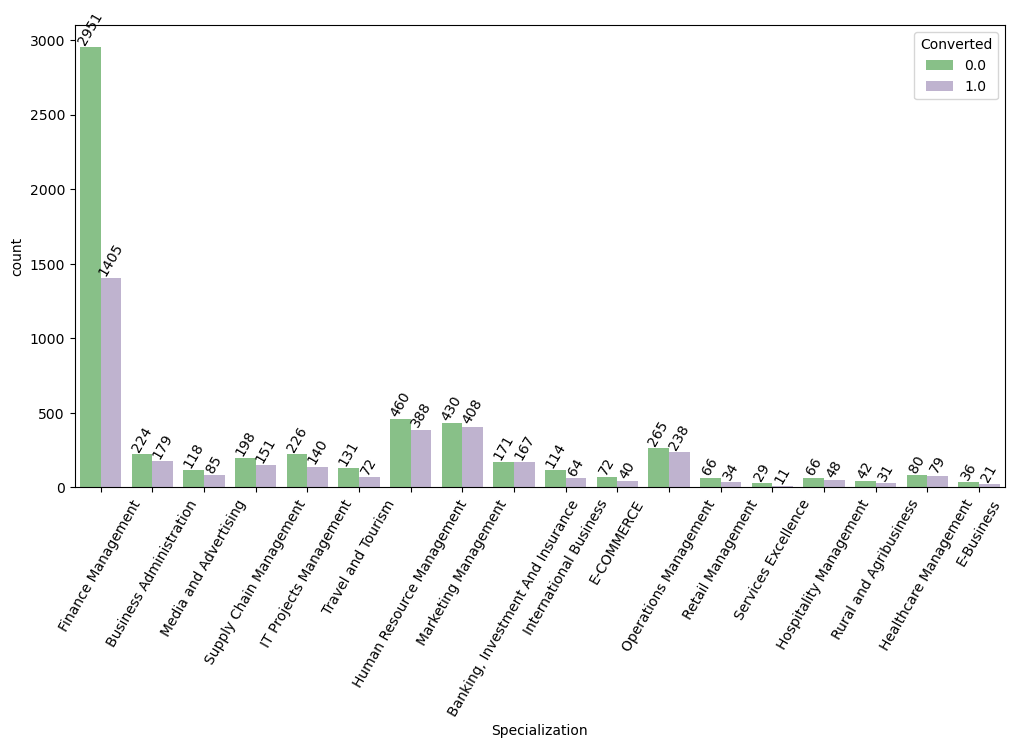

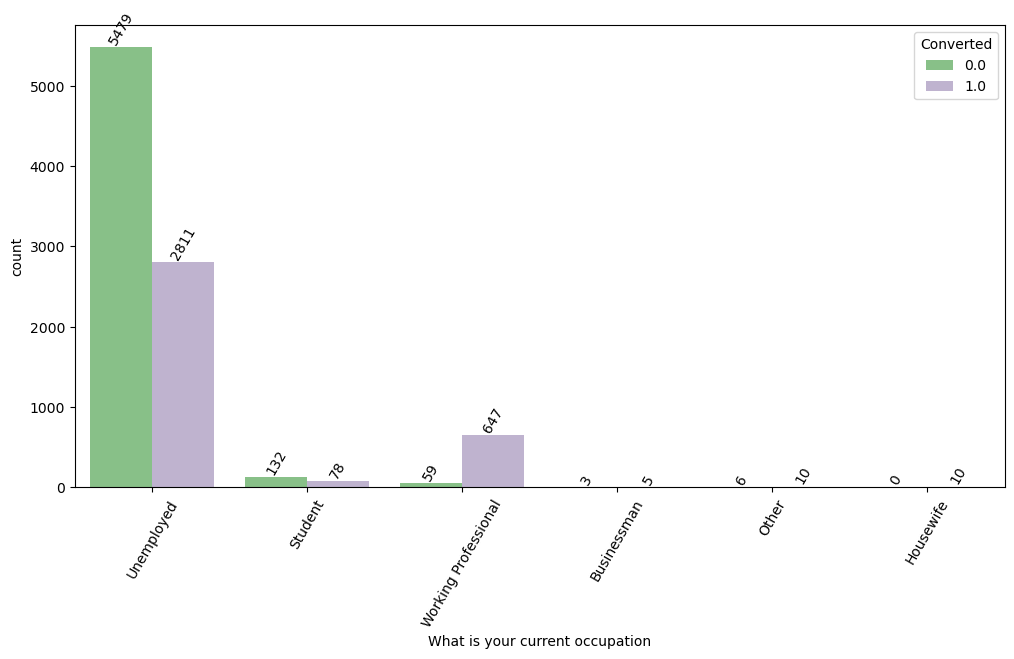

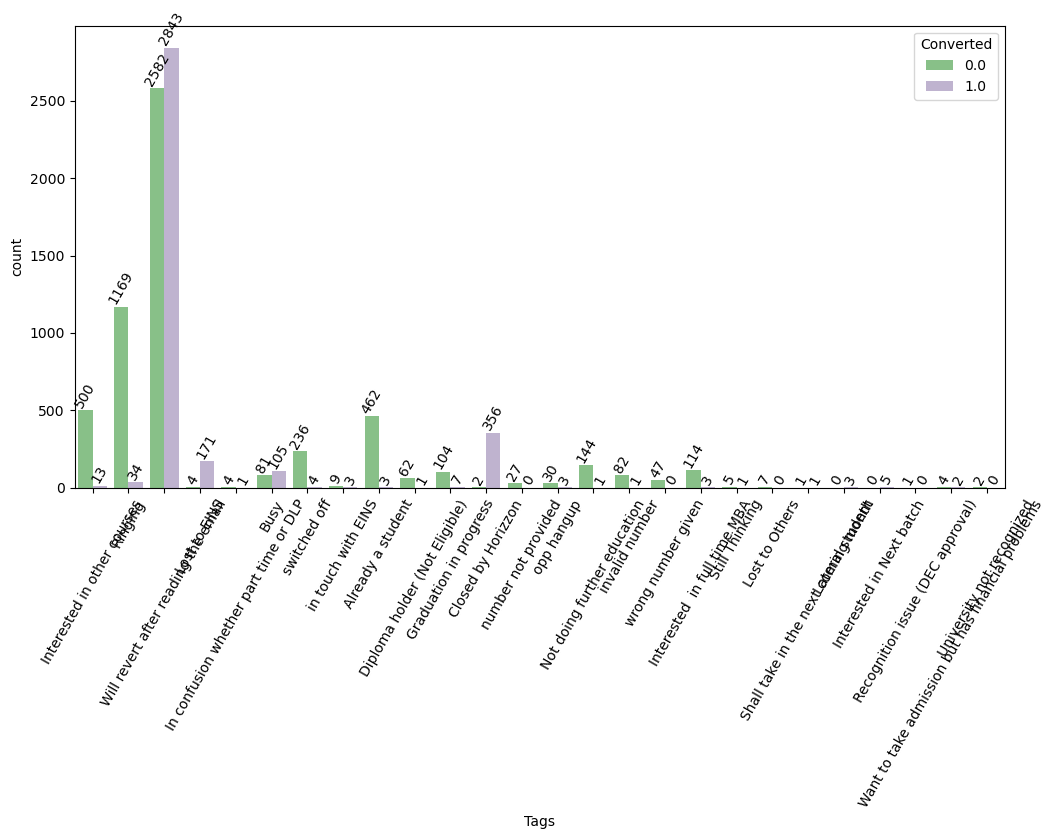

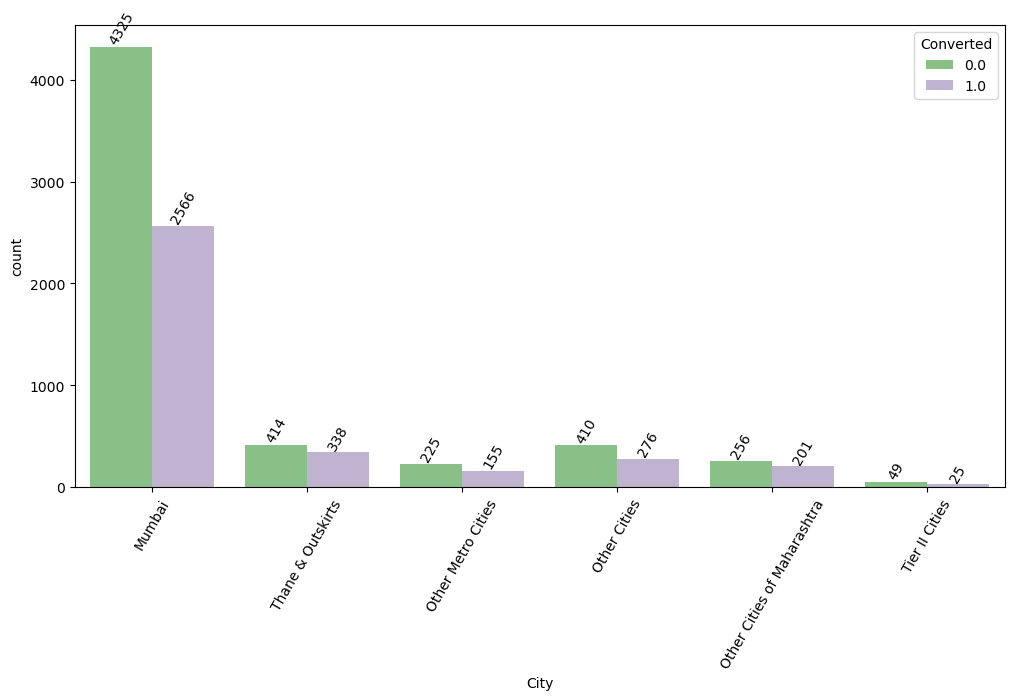

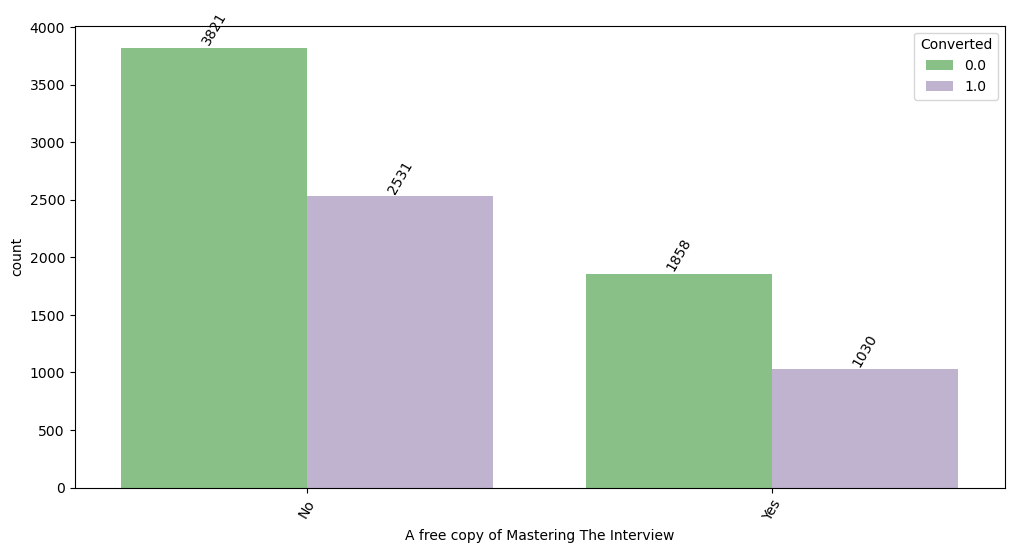

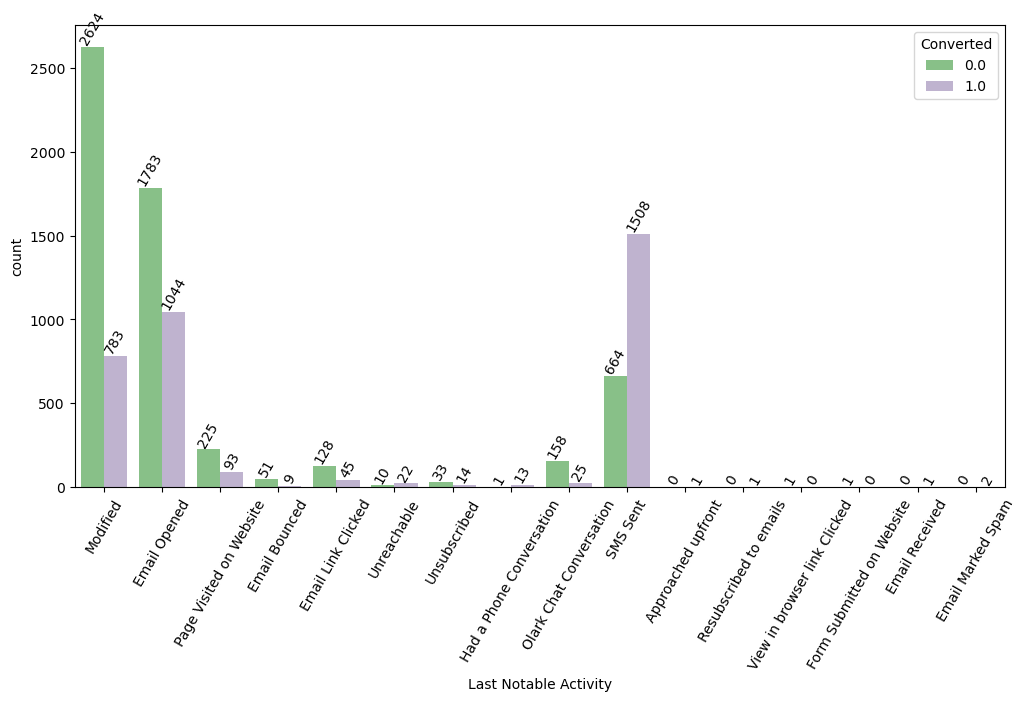

In [37]:
for col in cat_cols:
    plt.figure(figsize=(12,6))
    ax=sns.countplot(data=lead_df,x=col,palette='Accent',hue=lead_df.Converted)
    for x in ax.containers:
        ax.bar_label(x,rotation=60)
    plt.xticks(rotation=60)
    plt.show()

### Inferences from the categorical analysis 
    -Maximum number of leads are generated by Google and Direct traffic.
    -Conversion Rate of reference leads and leads through welingak website is high.
    -To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, 
    direct traffic, and google leads and generate more leads from reference and welingak website.
    -Leads converted of last notable activity to whom the SMS was sent.
    -Working Professionals going for the course have high chances of joining it.
    Unemployed leads are the most in terms of Absolute numbers.
    -API and Landing Page Submission bring higher number of leads as well as conversion.
    -Lead Add Form has a very high conversion rate but count of leads are not very high.
    -Lead Import and Quick Add Form get very few leads.
    -In order to improve overall lead conversion rate, we have to improve lead converion of API and 
    Landing Page Submission origin and generate more leads from Lead Add Form.

## Data Preparation for Modelling 

In [38]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0.0,0.0,0.0,0.0,Page Visited on Website,India,Finance Management,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0.0,5.0,674.0,2.5,Email Opened,India,Finance Management,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1.0,2.0,1532.0,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0.0,1.0,305.0,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1.0,2.0,1428.0,1.0,Converted to Lead,India,Finance Management,Unemployed,Will revert after reading the email,Mumbai,No,Modified


##### Converting the columns to dummy variables 

In [39]:
Leads_Data = pd.get_dummies(data=lead_df,columns=cat_cols,drop_first=True)
Leads_Data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last 

### Importing important libraries required in predictive model building.
    - And importing standard scaler to standardise and scale the numeric columns

In [40]:
#cols=Leads_Data.columns.to_list()
#for col in cols:
 #   if Leads_Data[col].dtype=="bool":
  #      Leads_Data[col]=Leads_Data[col].astype("uint8")

In [41]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
Leads_Data.shape

(9240, 150)

#### Splitting the Data into Train and Test data  

In [43]:
#Separating the dependant and independant variables
X = Leads_Data.drop('Converted', axis = 1)
y = Leads_Data['Converted']

In [44]:
#Splitting the data into test and train 
X_train, X_test, y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100) 

In [45]:
#shape of test and test data sets after split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6468, 149)
(2772, 149)
(6468,)
(2772,)


    -Let us scale continuous variables and Fit and transform training set only

Standard Scaler helps to get standardized distribution, with a zero mean and standard deviation of one (unit variance). It standardizes features by subtracting the mean value from the feature and then dividing the result by feature standard deviation. 

In [46]:
scaler=StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Ac

    -Let's look at the Xtrain Stats

In [47]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Ac

    -As we can see the values are scaled between 0 and 1

In [48]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Ac

## What is Recursive Feature Elimination (RFE)?
Recursive Feature Elimination (RFE) is a feature selection algorithm that is used to select a subset of the most relevant features from a dataset. It is a recursive process that starts with all the features in the dataset and then iteratively removes the least essential features until the desired number of features is reached. 

In [49]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

In [50]:
#finding the coarse or top features through RFE 

rfe = RFE(logreg, n_features_to_select = 30)
rfe = rfe.fit(X_train, y_train)

In [51]:
rfe_table = pd.DataFrame(list(zip(X_train.columns, rfe.support_ , rfe.ranking_)), columns = ['feature', 'support', 'rank'])
rfe_table

,feature,support,rank
0,TotalVisits,False,54
1,Total Time Spent on Website,True,1
2,Page Views Per Visit,False,55
3,Lead Origin_Landing Page Submission,False,14
4,Lead Origin_Lead Add Form,True,1
5,Lead Origin_Lead Import,False,83
6,Lead Origin_Quick Add Form,False,56
7,Lead Source_Direct Traffic,False,68
8,Lead Source_Facebook,False,64
9,Lead Source_Google,False,70


In [52]:
col = X_train.columns[rfe.support_] #we will only take these columns in our future analysis and model building

In [53]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Country_Qatar',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Graduation in progress', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Shall take in the next coming month',
       'Tags_Want to take admission but has financial problems',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversa

    - ~rfe.support_: The tilde (~) is a logical NOT operator. So, ~rfe.support_ negates the boolean values in the 
    rfe.support_ array. 
    If a feature was selected (True), it becomes False after the negation, and vice versa.

    -X_train.columns[~rfe.support_]: Finally, this part uses the boolean mask (~rfe.support_) to select the column names 
    of the features that were not selected by the feature selection method.

In summary, the code extracts the column names of the features that were not selected by the RFE method, providing insight into which features were considered less important or relevant by the feature selection process.

In [54]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM',
       ...
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=119)

In [55]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[col]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

### Assessing the models 

## Model 1 

In [56]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1731.2
Date:                Tue, 19 Mar 2024   Deviance:                       3462.4
Time:                        20:23:54   Pearson chi2:                 1.36e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5480
Covariance Type:            nonrobust                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [57]:
#dropping the column qatar due to high p value
col = col.drop('Country_Qatar', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Graduation in progress', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Shall take in the next coming month',
       'Tags_Want to take admission but has financial problems',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'La

## Model 2 

In [58]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6438
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1733.9
Date:                Tue, 19 Mar 2024   Deviance:                       3467.9
Time:                        20:23:54   Pearson chi2:                 1.35e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5476
Covariance Type:            nonrobust                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [59]:
# dropping Tags_Will revert after reading the email due to high vif
col = col.drop('Tags_Will revert after reading the email', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Graduation in progress', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Shall take in the next coming month',
       'Tags_Want to take admission but has financial problems',
       'Tags_in touch with EINS', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable

## Model 3 

In [60]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1974.2
Date:                Tue, 19 Mar 2024   Deviance:                       3948.3
Time:                        20:23:55   Pearson chi2:                 1.50e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5127
Covariance Type:            nonrobust                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [61]:
#dropping Tags_Lateral student due to high p value
col = col.drop('Tags_Lateral student', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Graduation in progress', 'Tags_Interested in Next batch',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Shall take in the next coming month',
       'Tags_Want to take admission but has financial problems',
       'Tags_in touch with EINS', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],

## Model 4 

In [62]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1977.3
Date:                Tue, 19 Mar 2024   Deviance:                       3954.6
Time:                        20:23:55   Pearson chi2:                 1.50e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5122
Covariance Type:            nonrobust                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [63]:
#dropping Tags_Interested in Next batch due to high p value 
col = col.drop('Tags_Interested in Next batch', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Graduation in progress', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Shall take in the next coming month',
       'Tags_Want to take admission but has financial problems',
       'Tags_in touch with EINS', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

## Model 5 

In [64]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6441
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1977.7
Date:                Tue, 19 Mar 2024   Deviance:                       3955.4
Time:                        20:23:56   Pearson chi2:                 1.50e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5122
Covariance Type:            nonrobust                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [65]:
#dropping Tags_Shall take in the next coming month due to high p value 
col = col.drop('Tags_Shall take in the next coming month', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Graduation in progress', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Want to take admission but has financial problems',
       'Tags_in touch with EINS', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

## Model 6 

In [66]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1979.7
Date:                Tue, 19 Mar 2024   Deviance:                       3959.4
Time:                        20:23:56   Pearson chi2:                 1.50e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5119
Covariance Type:            nonrobust                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [67]:
#dropping Tags_Diploma holder (Not Eligible) due to high p value
col = col.drop('Tags_Diploma holder (Not Eligible)', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Want to take admission but has financial problems',
       'Tags_in touch with EINS', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

## Model 7 

In [68]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1998.4
Date:                Tue, 19 Mar 2024   Deviance:                       3996.9
Time:                        20:23:57   Pearson chi2:                 1.49e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5091
Covariance Type:            nonrobust                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [69]:
#dropping Tags_number not provided due to high p value
col = col.drop('Tags_number not provided', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Want to take admission but has financial problems',
       'Tags_in touch with EINS', 'Tags_invalid number', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

## Model 8 

In [70]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.4
Date:                Tue, 19 Mar 2024   Deviance:                       4022.8
Time:                        20:23:57   Pearson chi2:                 1.47e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5071
Covariance Type:            nonrobust                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [71]:
#dropping Tags_wrong number given due to high p value
col = col.drop('Tags_wrong number given', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Want to take admission but has financial problems',
       'Tags_in touch with EINS', 'Tags_invalid number', 'Tags_switched off',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

## Model 9 

In [72]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2030.9
Date:                Tue, 19 Mar 2024   Deviance:                       4061.8
Time:                        20:23:57   Pearson chi2:                 1.43e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5041
Covariance Type:            nonrobust                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [73]:
#dropping Tags_in touch with EINS due to high p value
col = col.drop('Tags_in touch with EINS', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Want to take admission but has financial problems',
       'Tags_invalid number', 'Tags_switched off',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

## Model 10 

In [74]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2030.9
Date:                Tue, 19 Mar 2024   Deviance:                       4061.8
Time:                        20:23:57   Pearson chi2:                 1.43e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5041
Covariance Type:            nonrobust                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [75]:
#dropping Tags_Want to take admission but has financial problems due to high p value 
col = col.drop('Tags_Want to take admission but has financial problems', 1)
col 

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_invalid number',
       'Tags_switched off', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

## Model 11 

In [76]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2031.4
Date:                Tue, 19 Mar 2024   Deviance:                       4062.9
Time:                        20:23:58   Pearson chi2:                 1.43e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5040
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [77]:
#dropping What is your current occupation_Unemployed diue to high p value
col = col.drop('What is your current occupation_Unemployed', 1)
col 

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_invalid number',
       'Tags_switched off', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

## Model 12 

In [78]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2032.0
Date:                Tue, 19 Mar 2024   Deviance:                       4064.1
Time:                        20:23:58   Pearson chi2:                 1.43e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5039
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [79]:
#dropping Tags_Busy due to hi p value 
col = col.drop('Tags_Busy', 1)
col 

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_invalid number',
       'Tags_switched off', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

## Model 13 

In [80]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2033.6
Date:                Tue, 19 Mar 2024   Deviance:                       4067.1
Time:                        20:23:58   Pearson chi2:                 1.41e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5037
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

    - All the features are in range of low p value and vif.
    -Proceeding with these features 

#### Getting the predicted values on the training set

In [81]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.001619
6795    0.262425
3516    0.001947
8105    0.157448
3934    0.132239
4844    0.997132
3297    0.001877
8071    0.999944
987     0.114866
7423    0.969094
dtype: float64

## Creating new dataframe having Converted status and predicted status 

In [82]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_prob': y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
1871,0.0,0.001619,1871
6795,0.0,0.262425,6795
3516,0.0,0.001947,3516
8105,0.0,0.157448,8105
3934,0.0,0.132239,3934


#### Predicting dependent variable on train data.

In [83]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
1871,0.0,0.001619,1871,0
6795,0.0,0.262425,6795,0
3516,0.0,0.001947,3516,0
8105,0.0,0.157448,8105,0
3934,0.0,0.132239,3934,0


### Generating Confusion matrix 

In [84]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3672  330]
 [ 486 1980]]


Let's check the overall accuracy

In [85]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8738404452690167


In [86]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Let's see the sensitivity of our logistic regression model

In [87]:
TP / float(TP+FN)

0.8029197080291971

Let's check the specificity

In [88]:
TN / float(TN+FP)

0.9175412293853074

Calculating False Postive Rate

In [89]:
print(FP/ float(TN+FP))

0.08245877061469266


positive predictive value

In [90]:
print (TP / float(TP+FP))

0.8571428571428571


Negative predictive value

In [91]:
print(TN/float (TN + FN))

0.8831168831168831


### PLOTTING ROC CURVE 

In [92]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [93]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

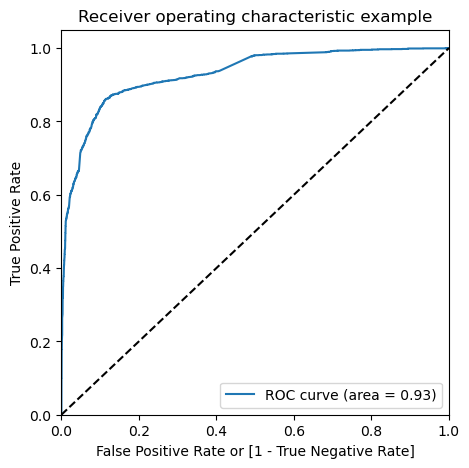

In [94]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.93 indicating a good predictive model.

### Finding Optimal Cutoff Point 

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [95]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0.0,0.001619,1871,0,1,0,0,0,0,0,0,0,0,0
6795,0.0,0.262425,6795,0,1,1,1,0,0,0,0,0,0,0
3516,0.0,0.001947,3516,0,1,0,0,0,0,0,0,0,0,0
8105,0.0,0.157448,8105,0,1,1,0,0,0,0,0,0,0,0
3934,0.0,0.132239,3934,0,1,1,0,0,0,0,0,0,0,0


Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

In [96]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.683364  0.980535  0.500250
0.2   0.2  0.823748  0.900649  0.776362
0.3   0.3  0.871676  0.870641  0.872314
0.4   0.4  0.875696  0.845499  0.894303
0.5   0.5  0.873840  0.802920  0.917541
0.6   0.6  0.866419  0.752230  0.936782
0.7   0.7  0.841837  0.648013  0.961269
0.8   0.8  0.820501  0.556367  0.983258
0.9   0.9  0.800402  0.493106  0.989755


Let's plot accuracy sensitivity and specificity for various probabilities.

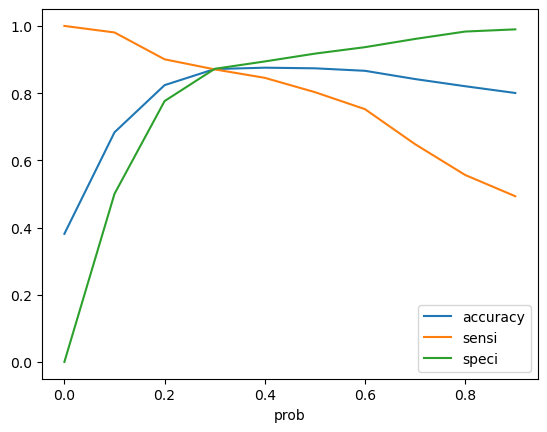

In [97]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

After calculating the sensitivity and specificity for various probabilities 0.4 is the optimum point to take it as a cutoff probability, since the cutoff range 0.3 - 0.4 is still too low, cutoff between 0.4-0.45 should be the optimum tradeoff.

In [98]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head(20)

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
1871,0.0,0.001619,1871,0,1,0,0,0,0,0,0,0,0,0,0
6795,0.0,0.262425,6795,0,1,1,1,0,0,0,0,0,0,0,0
3516,0.0,0.001947,3516,0,1,0,0,0,0,0,0,0,0,0,0
8105,0.0,0.157448,8105,0,1,1,0,0,0,0,0,0,0,0,0
3934,0.0,0.132239,3934,0,1,1,0,0,0,0,0,0,0,0,0
4844,1.0,0.997132,4844,1,1,1,1,1,1,1,1,1,1,1,1
3297,0.0,0.001877,3297,0,1,0,0,0,0,0,0,0,0,0,0
8071,1.0,0.999944,8071,1,1,1,1,1,1,1,1,1,1,1,1
987,0.0,0.114866,987,0,1,1,0,0,0,0,0,0,0,0,0
7423,1.0,0.969094,7423,1,1,1,1,1,1,1,1,1,1,1,1


In [99]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
1871,0.0,0.001619,1871,0,0
6795,0.0,0.262425,6795,0,26
3516,0.0,0.001947,3516,0,0
8105,0.0,0.157448,8105,0,16
3934,0.0,0.132239,3934,0,13


Let's check the overall accuracy.

In [100]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.87569573283859

In [101]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3579,  423],
       [ 381, 2085]], dtype=int64)

In [102]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

Let's see the sensitivity of our logistic regression model

In [103]:
TP / float(TP+FN)

0.8454987834549879

Let us calculate specificity

In [104]:
TN / float(TN+FP)

0.8943028485757122

## Observation:

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.93, which is very good. We have the following values for the Train Data:

Accuracy : 87.56%

Sensitivity : 84.54%

Specificity : 89.43%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

##### Calculate False Postive Rate - predicting converted when customer did not convert

In [105]:
print(FP/ float(TN+FP))

0.10569715142428786


##### Positive predictive value 

In [106]:
print (TP / float(TP+FP))

0.8313397129186603


##### Negative predictive value 

In [107]:
print (TN / float(TN+ FN))

0.9037878787878788


    -Looking at the confusion matrix again

In [108]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3579,  423],
       [ 381, 2085]], dtype=int64)

        -Precision : TP/TP + FP -- how precise you were in your assessment of predicting the true values/yeses 
         or True  Positives. 
        -Recall : TP/TP + FN -- how many of the correct values or true positives could you asses right.

####  Precision

In [109]:
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8313397129186603

##### Recall 

In [110]:
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8454987834549879

In [111]:
from sklearn.metrics import precision_score, recall_score

In [112]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8313397129186603

In [113]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8454987834549879

In [114]:
from sklearn.metrics import precision_recall_curve

In [115]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

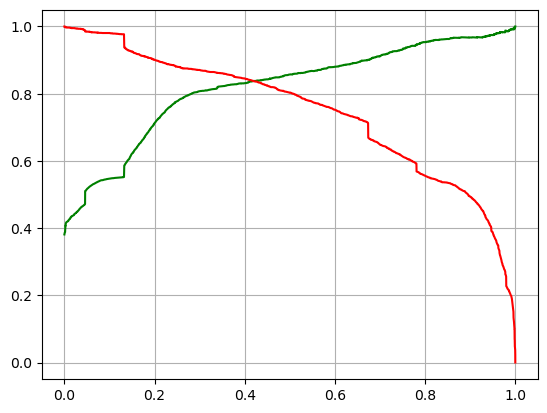

In [116]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.grid(True)
plt.show()

the cutoff is 0.42 from above precision and recall chart, lets check accuracy at cutoff 0.42

In [117]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
1871,0.0,0.001619,1871,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0.0,0.262425,6795,0,1,1,1,0,0,0,0,0,0,0,0,26
3516,0.0,0.001947,3516,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0.0,0.157448,8105,0,1,1,0,0,0,0,0,0,0,0,0,16
3934,0.0,0.132239,3934,0,1,1,0,0,0,0,0,0,0,0,0,13


In [118]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
1871,0.0,0.001619,1871,0,0
6795,0.0,0.262425,6795,0,26
3516,0.0,0.001947,3516,0,0
8105,0.0,0.157448,8105,0,16
3934,0.0,0.132239,3934,0,13


Let's check the overall accuracy.

In [119]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8760049474335189

In [120]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3602,  400],
       [ 402, 2064]], dtype=int64)

In [121]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

    -Let's see the sensitivity of our logistic regression model

In [122]:
TP / float(TP+FN)

0.8369829683698297

    -Let us calculate specificity

In [123]:
TN / float(TN+FP)

0.9000499750124937

There is slight changes from 0.4 to 0.42 cutoff but it can be significant, so we will go ahead with the cutoff of 0.42

## Making Predictions on Test Set 

### Scaling Test set 
    -The transform method applies the transformation to the data using the parameters computed during the fit phase.

In [124]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Ac

In [125]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_invalid number',
       'Tags_switched off', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [126]:
X_test = X_test[col]
X_test.head(30)

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Lost to EINS,Tags_Ringing,Tags_invalid number,Tags_switched off,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
4269,0.964504,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2376,-0.885371,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7766,-0.777416,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
9199,-0.885371,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4359,-0.885371,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9186,0.234435,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1631,0.968164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8963,-0.394998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8007,-0.255938,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5324,-0.592611,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [127]:
X_test_sm = sm.add_constant(X_test[col])

In [128]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.923037
2376    0.979675
7766    0.906928
9199    0.045890
4359    0.780734
9186    0.856885
1631    0.470634
8963    0.195494
8007    0.054064
5324    0.731588
dtype: float64

Converting y_pred to a dataframe

In [129]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.923037
2376,0.979675
7766,0.906928
9199,0.045890
4359,0.780734


Converting y_test to dataframe

In [130]:
y_test_df = pd.DataFrame(y_test)

#Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index


In [131]:
#Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

Appending y_test_df and y_pred_1

In [132]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1.0,4269,0.923037
1,1.0,2376,0.979675
2,1.0,7766,0.906928
3,0.0,9199,0.045890
4,1.0,4359,0.780734


Renaming the column

In [133]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [134]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1.0,4269,0.923037
1,1.0,2376,0.979675
2,1.0,7766,0.906928
3,0.0,9199,0.045890
4,1.0,4359,0.780734


Rearranging the columns

In [135]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

Let's see the head of y_pred_final

In [136]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4269,1.0,0.923037,92
1,2376,1.0,0.979675,98
2,7766,1.0,0.906928,91
3,9199,0.0,0.045890,5
4,4359,1.0,0.780734,78


In [137]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

In [138]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1.0,0.923037,92,1
1,2376,1.0,0.979675,98,1
2,7766,1.0,0.906928,91,1
3,9199,0.0,0.045890,5,0
4,4359,1.0,0.780734,78,1


Let's check the overall accuracy.

In [139]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8791486291486291

In [140]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1495,  182],
       [ 153,  942]], dtype=int64)

In [141]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

    --Let's see the sensitivity of our logistic regression model

In [142]:
TP / float(TP+FN)

0.8602739726027397

    --Let us calculate specificity

In [143]:
TN / float(TN+FP)

0.8914728682170543

In [144]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8380782918149466

In [145]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8602739726027397

### Comparing the Train & Test Data observations 

## Observations on the train set:

Accuracy : 87.56%

Sensitivity : 84.54%

Specificity : 89.43%

## Observations on the test set:

Accuracy : 87.91%

Sensitivity : 86.02%

Specificity : 89.14%

As we can see the model is performing well and the sensitivity has increased from train set to test set. This is a good model to be recommended to the CEO for maximum lead conversion

#### Cut-off Threshold - 04 (as per sensitivity and specificity) and 0.42 (as per Precision & Recall)

### Top features 
       'Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_invalid number',
       'Tags_switched off', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'

In [146]:
hot_leads = y_pred_final[y_pred_final["Lead_Score"] >= 85]

hot_leads

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1.0,0.923037,92,1
1,2376,1.0,0.979675,98,1
2,7766,1.0,0.906928,91,1
5,9186,1.0,0.856885,86,1
12,2935,1.0,0.973141,97,1
...,...,...,...,...,...
2756,3820,1.0,0.995281,100,1
2765,9202,0.0,0.914739,91,1
2766,3118,0.0,0.908571,91,1
2768,2152,1.0,0.979675,98,1


In [147]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([4269, 2376, 7766, 9186, 2935, 2907, 4877, 1557, 8899, 8522, 8429,
       2061, 1200, 7909, 5638, 7631, 7250, 8714, 3289, 6666, 5448, 1287,
       8103, 3444, 2392, 6017, 5363, 6223, 8499, 6418, 4830, 7306, 3192,
       2913, 1365, 6687, 5793, 6066, 8099, 3936, 4868, 8120, 2844, 4896,
       8083, 7396,   88,  643, 7620, 7683, 8262, 8024, 6860, 4058, 8547,
       5042, 6557,  942, 5896,  269, 5092, 5666, 8113,  534, 4645, 7159,
        914, 7978, 3518, 1965, 3845, 2946, 4869, 7876,  954, 4902, 5818,
       2804, 7344,  446, 3173, 3725, 2199, 4786, 7812, 1026, 2918, 7859,
       5825, 8055, 2266, 2926, 4194, 2524, 8966, 1867, 7503, 1467, 5697,
       7832, 4221, 6725, 6156, 2055, 2549, 2653, 3478, 5687, 4445, 3665,
       2249, 6898, 3751, 5832, 9064, 3190,   77, 5010, 1562, 6162, 6243,
       4038, 7187, 2140, 5812, 4646, 2589,  841, 7033, 3188, 7716, 8556,
       3228, 6921, 3500, 7818, 3688, 7895, 1675, 4483, 5528, 3321, 1973,
       7053, 4212, 3778, 1350, 8576, 6996, 6632, 78